In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# mpg.csv 데이터 불러오기
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [27]:
# 1번
# 원하는 차량 대상은 'suv' 이므로 query를 사용하여 카테고리중 'suv' 만 불러온다.
df = mpg.query('category=="suv"')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


In [28]:
# 불러온 'suv' 차량들을 제조사별로 그룹화한다. as_index 파라미터 : False로 할 경우 flat한 데이터프레임 반환
df = df.groupby('manufacturer',as_index=False)\
    .agg(mean_cty=('cty','mean')).sort_values('mean_cty',ascending=0).head() # 제조사별로 그룹화된 'suv' 차량들의 'cty'평균을 새 컬럼으로 만든다.
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<AxesSubplot: xlabel='manufacturer', ylabel='mean_cty'>

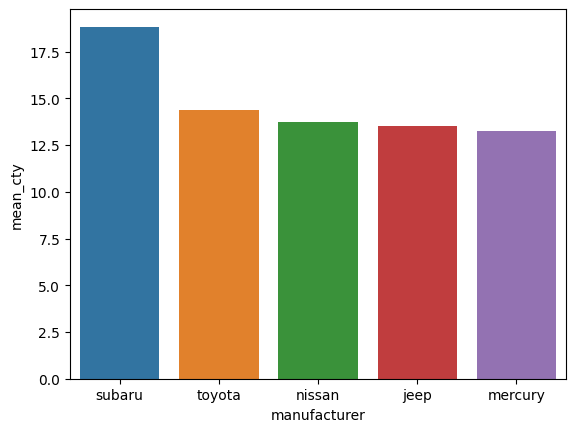

In [29]:
# 위 데이터를 barplot을 이용하여 막대 그래프로 시각화 한다.
sns.barplot(data=df, x='manufacturer',y='mean_cty')
# 원한는 그래프가 나온다.

In [41]:
# 2번
# 'mpg.csv' 데이터를 읽는다.
mpg = pd.read_csv('mpg.csv')
mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<AxesSubplot: xlabel='category', ylabel='count'>

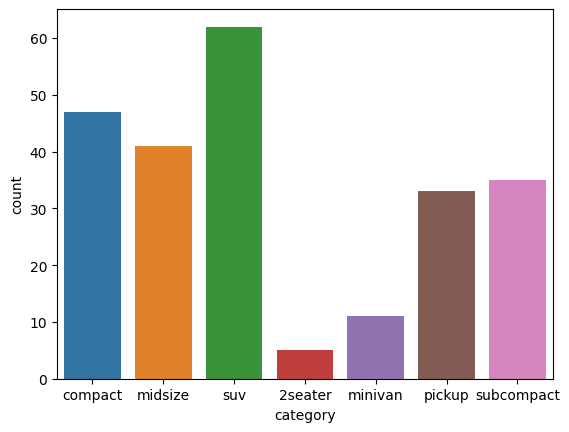

In [40]:
# 막대그래프 시각화 중 하나인 countplot 을 사용하여
# 원하는 컬럼을 카운팅한다.
sns.countplot(data=mpg,x='category')

In [42]:
# 많은순으로 정렬하기위해 countplot의 속성중 하나인 order을 사용한다.
# 단 이 order을 변수값으로 사용해 보자.

In [43]:
# 차량종류를 많은 순으로 출력해주는 변수를 만든다.
df = mpg['category'].value_counts().index
df

Index(['suv', 'compact', 'midsize', 'subcompact', 'pickup', 'minivan',
       '2seater'],
      dtype='object')

<AxesSubplot: xlabel='category', ylabel='count'>

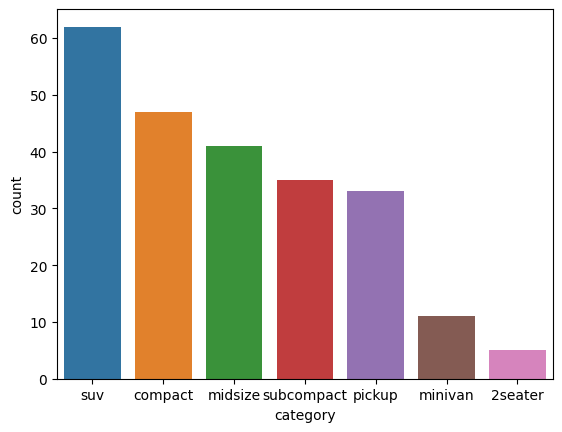

In [44]:
# countplot 으로 그래프를 만들때 order 속성에 위 변수를 입력해준다.
sns.countplot(data=mpg, x='category',order=df)
# 원하는 그래프가 나온다.